In [1]:
import copy
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Читаем данные 

In [2]:
url = 'insurance.csv'
data_raw = pd.read_csv(url)
data_raw

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Обработка категориальных признаков 

In [4]:
#даем объектам признак котегориальный.
data_raw['sex'] = data_raw['sex'].astype('category')
data_raw['smoker'] = data_raw['smoker'].astype('category')
data_raw['region'] = data_raw['region'].astype('category')

In [5]:
data_raw.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data_raw.describe(include = ['category'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# Пропущенные значения 

In [7]:
data_raw.isnull().sum() #ищем количество прошущенных значений. 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
[feature for feature in data_raw if data_raw.columns.isnull().sum() == 0] #ищем количество прошущенных значений. 

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

# Визуализация 

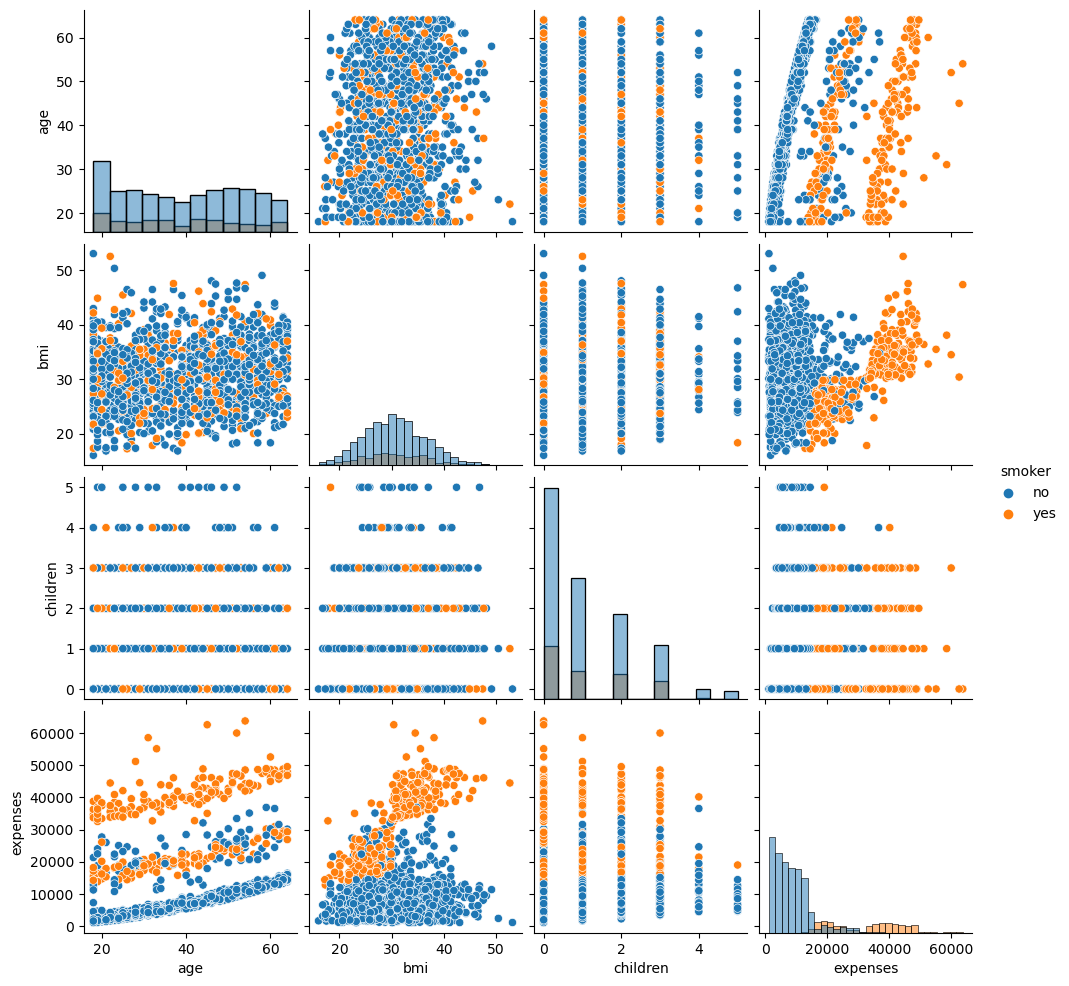

In [9]:
sns.pairplot(data_raw, hue = 'smoker', diag_kind='hist')

<Axes: >

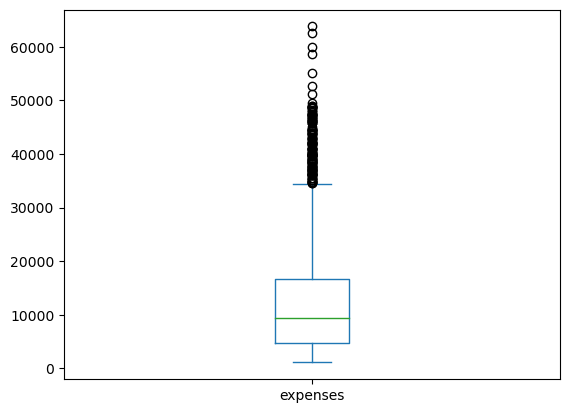

In [10]:
data_raw['expenses'].plot(kind = 'box')

In [11]:
data_raw['expenses'].quantile([0.005,.01,.05,.5,.9,.95,.995])

0.005     1145.11475
0.010     1252.97610
0.050     1757.75450
0.500     9382.03000
0.900    34831.71600
0.950    41181.82600
0.995    50086.98350
Name: expenses, dtype: float64

In [12]:
data_raw['bmi'].quantile([0.005,.01,.05,.5,.9,.95,.995])

0.005    17.3685
0.010    17.9370
0.050    21.2700
0.500    30.4000
0.900    38.6300
0.950    41.1000
0.995    47.5315
Name: bmi, dtype: float64

In [13]:
data_raw['age'].quantile([0.005,.01,.05,.5,.9,.95,.995])

0.005    18.0
0.010    18.0
0.050    18.0
0.500    39.0
0.900    59.0
0.950    62.0
0.995    64.0
Name: age, dtype: float64

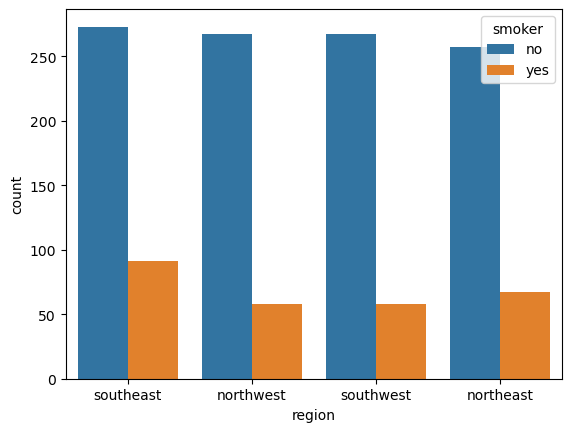

In [14]:
sns.countplot(x='region', order=data_raw['region'].value_counts().index, hue='smoker', data=data_raw)
pass

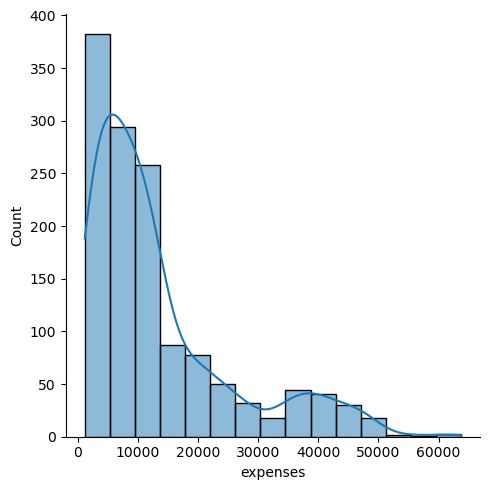

In [15]:
sns.displot(data_raw['expenses'],bins=15, kde =True)

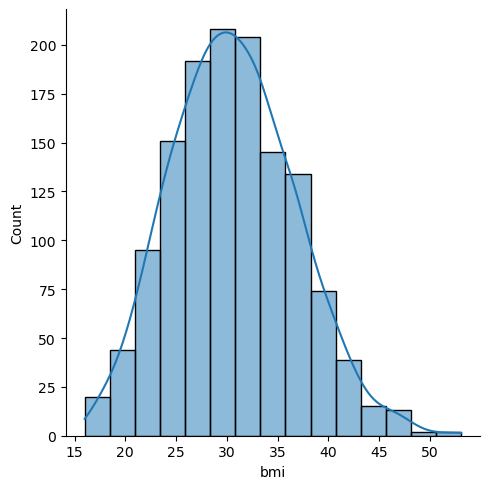

In [16]:
sns.displot(data_raw['bmi'],bins=15, kde =True)

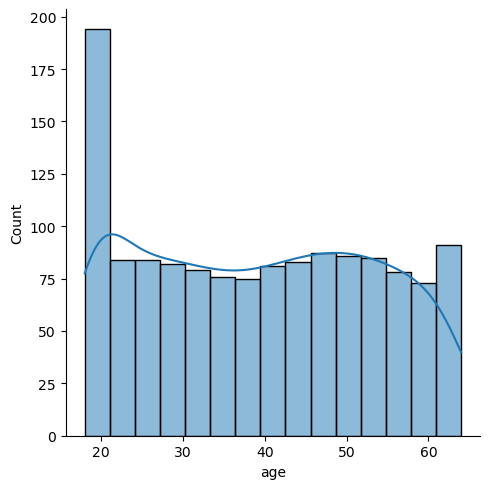

In [17]:
sns.displot(data_raw['age'],bins=15, kde =True)

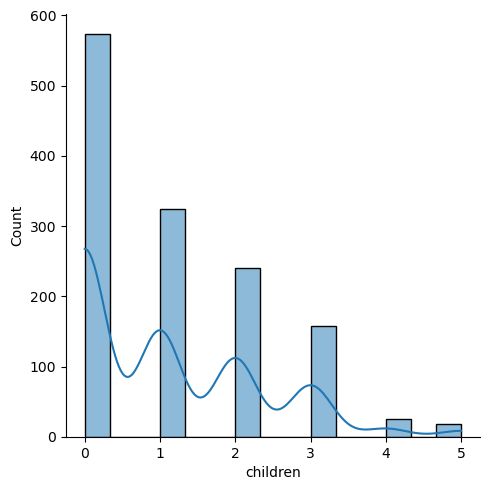

In [18]:
sns.displot(data_raw['children'],bins=15, kde =True)

<Axes: xlabel='smoker', ylabel='expenses'>

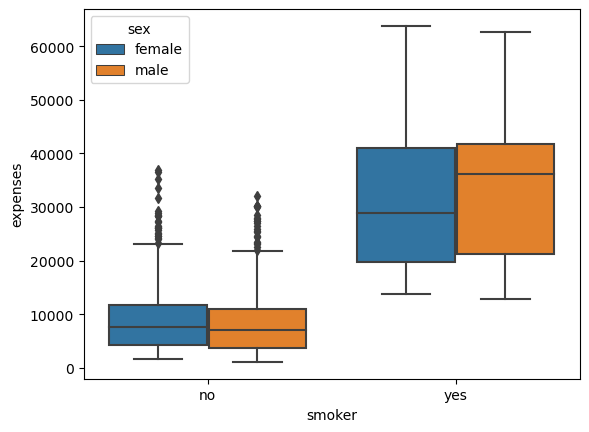

In [19]:
sns.boxplot(x = "smoker", y = "expenses", hue ="sex", data=data_raw) #сильная зависимость цены и курением 

In [20]:
#матрица  корреляции 
corr_mat = data_raw.corr(numeric_only = True)
corr_mat

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


<Axes: >

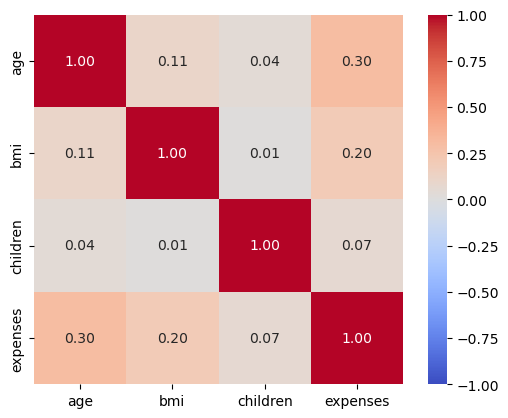

In [21]:
sns.heatmap(corr_mat, square=True,annot = True,fmt='.2f',vmin = -1, vmax=1, cmap='coolwarm')

In [22]:
corr_mat > 0.4 #слабые зависимости

,age,bmi,children,expenses
age,True,False,False,False
bmi,False,True,False,False
children,False,False,True,False
expenses,False,False,False,True


# Бинаризация номимнальных признаков 

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop = 'if_binary', sparse = False)
enc.fit(data_raw[['sex','smoker', 'region']])#tut

C:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [24]:
dumnies = pd.DataFrame(enc.transform(data_raw[['sex','smoker', 'region']]),
                       columns=enc.get_feature_names_out(), index=data_raw.index)
dumnies.head()

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
data_raw = data_raw.drop(['sex','smoker', 'region'], axis = 1)
data_raw = pd.concat((data_raw,dumnies), axis = 1)
data_raw.head()#tut

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,1.0,0.0,0.0,1.0,0.0,0.0


# Нормализация данных

In [26]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)

In [27]:
data_stand.describe()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.672802e-16,-4.248387e-16,-2.522480e-17,-8.231250e-17,-1.194859e-16,8.496774e-17,5.310484e-18,2.124194e-17,-3.451814e-17,1.991431e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.509401e+00,-2.404813e+00,-9.082741e-01,-1.003183e+00,-1.010141e+00,-5.072734e-01,-5.650556e-01,-5.662062e-01,-6.110952e-01,-5.662062e-01
25%,-8.688299e-01,-7.158408e-01,-9.082741e-01,-7.043870e-01,-1.010141e+00,-5.072734e-01,-5.650556e-01,-5.662062e-01,-6.110952e-01,-5.662062e-01
50%,-1.473495e-02,-4.353136e-02,-7.873775e-02,-3.210891e-01,9.892209e-01,-5.072734e-01,-5.650556e-01,-5.662062e-01,-6.110952e-01,-5.662062e-01
75%,8.393600e-01,6.615737e-01,7.507986e-01,2.782403e-01,9.892209e-01,-5.072734e-01,-5.650556e-01,-5.662062e-01,1.635183e+00,-5.662062e-01
max,1.764630e+00,3.678767e+00,3.239407e+00,4.170104e+00,9.892209e-01,1.969850e+00,1.768415e+00,1.764821e+00,1.635183e+00,1.764821e+00


# Разбиение на обучающую и тестовую выборку

In [28]:
X = data_stand.drop(['expenses'], axis=1)
y = data_stand['expenses']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(1003, 335)

# Обучение

In [30]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_predict = model.predict(X_train)
X_train.describe()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,0.003431,-0.024894,0.008103,-0.001490,0.001488,0.018894,0.005511,-0.031049,0.007835
std,0.999227,0.986043,0.999275,1.000139,1.001212,1.011262,1.003410,0.983593,1.004783
min,-1.509401,-2.404813,-0.908274,-1.010141,-0.507273,-0.565056,-0.566206,-0.611095,-0.566206
25%,-0.868830,-0.732239,-0.908274,-1.010141,-0.507273,-0.565056,-0.566206,-0.611095,-0.566206
50%,-0.014735,-0.076327,-0.078738,0.989221,-0.507273,-0.565056,-0.566206,-0.611095,-0.566206
75%,0.839360,0.612380,0.750799,0.989221,-0.507273,0.601680,-0.566206,1.635183,-0.566206
max,1.764630,3.678767,3.239407,0.989221,1.969850,1.768415,1.764821,1.635183,1.764821


In [32]:
model.coef_

array([ 0.3011969 ,  0.1711759 ,  0.04248837,  0.0018804 ,  0.78771007,
        0.01785398,  0.00531023, -0.0101898 , -0.01257127])

In [33]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(0.2523099035304336, 0.5023045923843754)

# Тестируем модель 

In [34]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
R2_tain = r2_score(y_train, y_train_predict)
R2_test = r2_score(y_test, y_test_predict)
MSE_train,MSE_test,R2_tain,R2_test

(0.2523099035304336,
 0.23945438966550886,
 0.7449738407676126,
 0.7672722578855357)

# Разбиение на кластеры



In [36]:
from sklearn.cluster import Birch
model = Birch(threshold=0.3)
data_stand['smoker_yes'] = pd.factorize(data_stand['smoker_yes'])[0]

In [37]:
model.fit(data_raw)

Birch(threshold=0.3)

In [38]:
labels = pd.DataFrame({'labels':model.labels_})#кластеры
data_new = data_stand
data_new = pd.concat((data_new, labels), axis=1)
data_new.head(20)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,labels
0,-1.438227,-0.453476,-0.908274,0.298472,-1.010141,0,-0.565056,-0.566206,-0.611095,1.764821,2
1,-1.509401,0.513994,-0.078738,-0.953333,0.989221,1,-0.565056,-0.566206,1.635183,-0.566206,0
2,-0.797655,0.382811,1.580335,-0.728402,0.989221,1,-0.565056,-0.566206,1.635183,-0.566206,0
3,-0.441782,-1.306161,-0.908274,0.719574,0.989221,1,-0.565056,1.764821,-0.611095,-0.566206,2
4,-0.512957,-0.289498,-0.908274,-0.776511,0.989221,1,-0.565056,1.764821,-0.611095,-0.566206,0
5,-0.584132,-0.814228,-0.908274,-0.785615,-1.010141,1,-0.565056,-0.566206,1.635183,-0.566206,0
6,0.483487,0.448402,-0.078738,-0.415345,-1.010141,1,-0.565056,-0.566206,1.635183,-0.566206,0
7,-0.157084,-0.486272,1.580335,-0.494542,-1.010141,1,-0.565056,1.764821,-0.611095,-0.566206,0
8,-0.157084,-0.141918,0.750799,-0.566805,0.989221,1,1.768415,-0.566206,-0.611095,-0.566206,0
9,1.479931,-0.797830,-0.908274,1.292544,-1.010141,1,-0.565056,1.764821,-0.611095,-0.566206,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


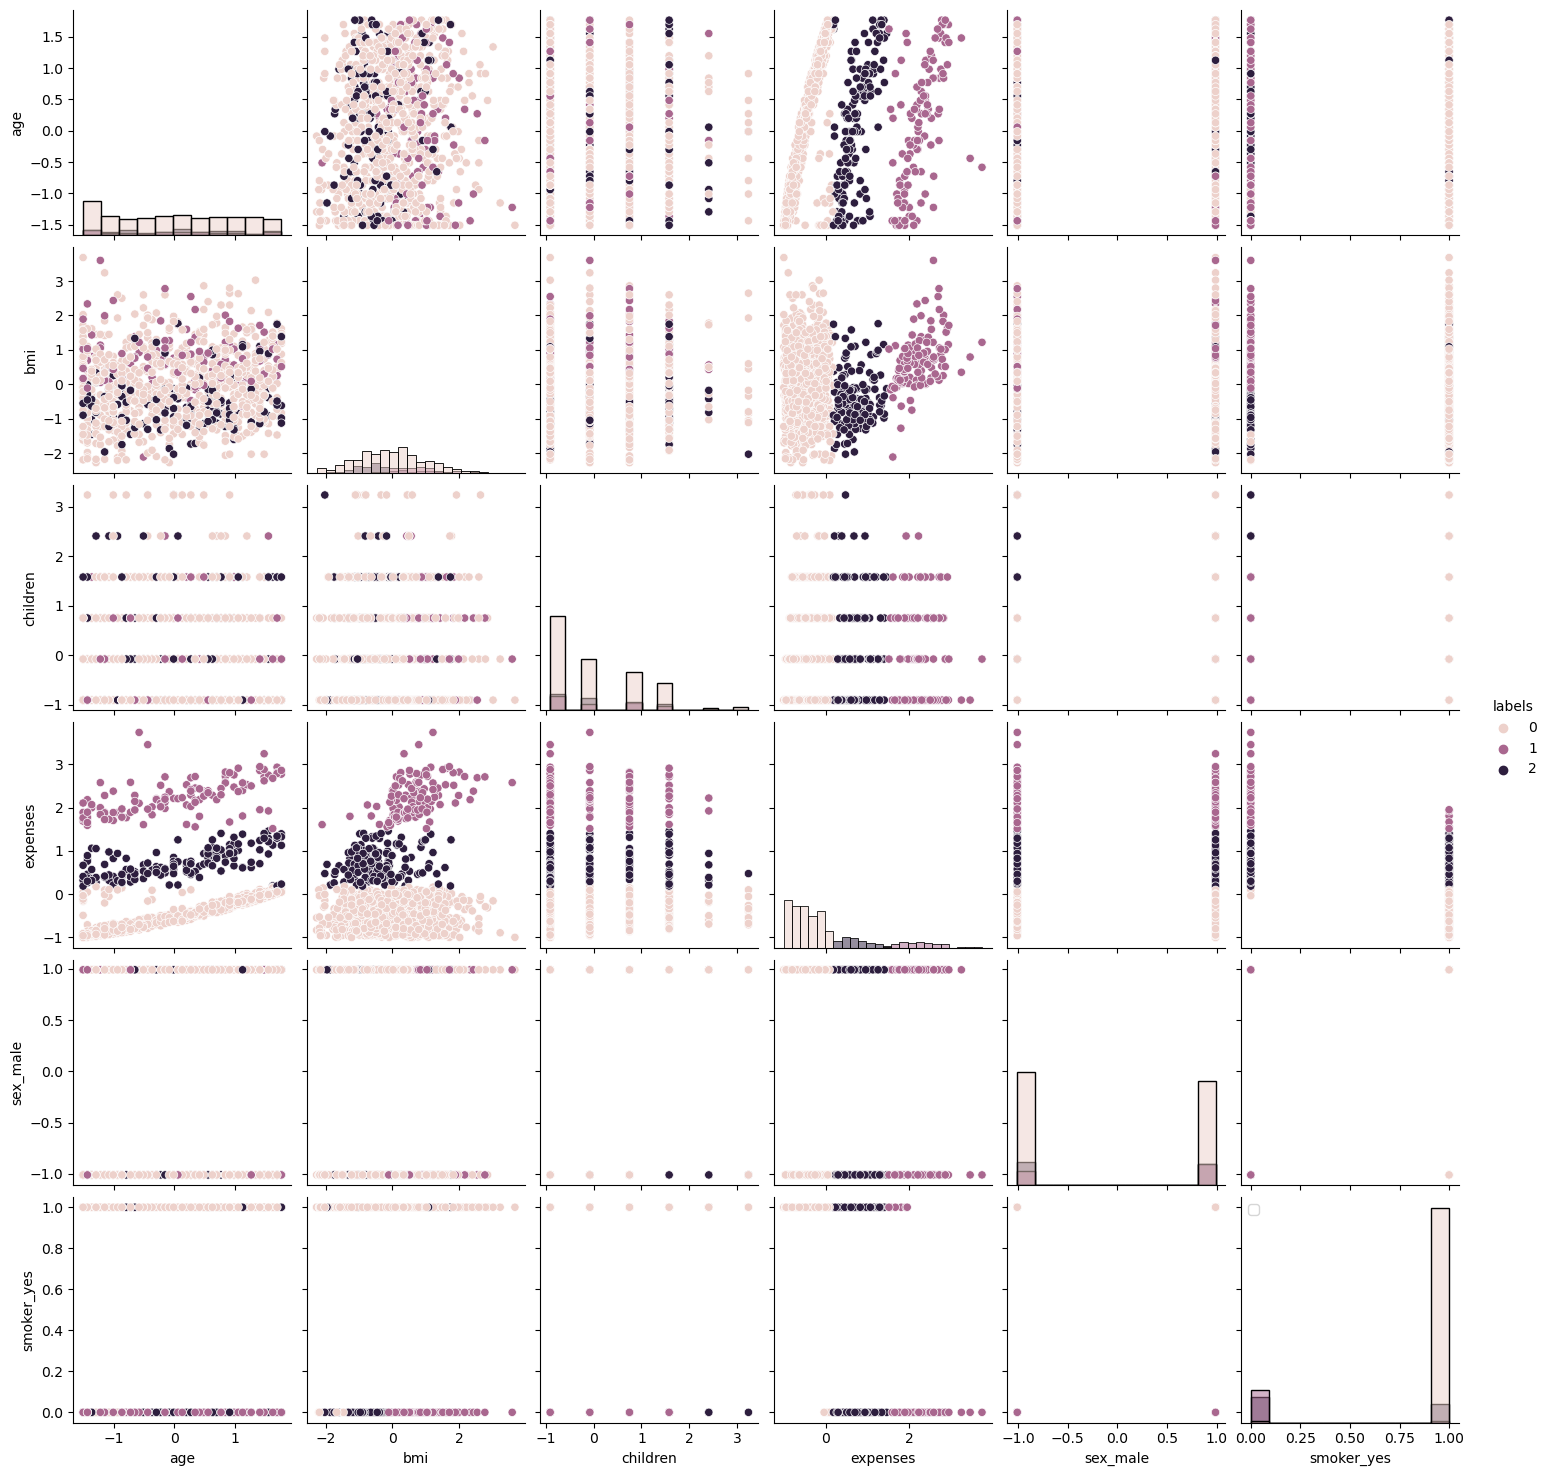

In [57]:
#Для визуализации и проверки уберём регионы, для удобства просмотра
data_new_w_r = copy.copy(data_new)
data_new_w_r = data_new_w_r.drop(['region_northeast'], axis=1)
data_new_w_r = data_new_w_r.drop(['region_northwest'], axis=1)
data_new_w_r = data_new_w_r.drop(['region_southeast'], axis=1)
data_new_w_r = data_new_w_r.drop(['region_southwest'], axis=1)



random_subset = np.random.choice(np.arange(data_new_w_r.shape[0]), size=1000, replace=False)
sns.pairplot(data_new_w_r.iloc[random_subset], hue = 'labels' , diag_kind='hist' )
plt.legend()
#Видно выделение 3 основных классов. Предположительно:
#1. Не курящие с хорошим bmi
#2. Курящие с нормальным bmi или не курящие с плохим bmi
#3. Кирящие с плохим bmi

expenses    labels        0.649747
smoker_yes  labels       -0.678166
expenses    smoker_yes   -0.787251
dtype: float64

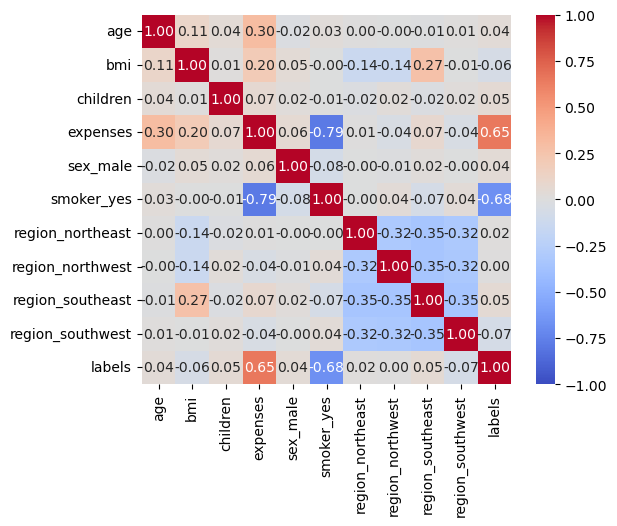

In [40]:
#Корреляция для новых данных
corr_mat = data_new.corr()
sns.heatmap(corr_mat, square=True,annot = True,fmt='.2f',vmin = -1, vmax=1, cmap='coolwarm')
corr_mat.where(np.triu(abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)
#Заметна корреляция между
#1. Ценой страховки и курящими
#2. Ценой страховки и принадлежностью к определённому классу

Элементов в классе: 986


age  expenses    0.888116
dtype: float64

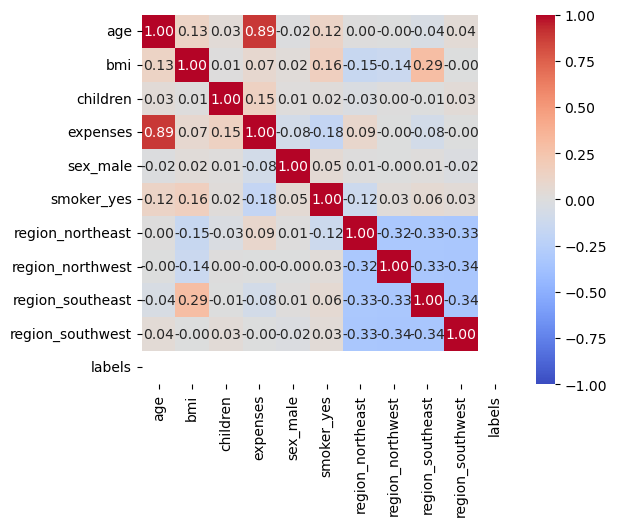

In [41]:
#Корреляция для группы 1 группы
corr_mat = data_new[model.labels_ == 0].corr()
sns.heatmap(corr_mat, square=True,annot = True,fmt='.2f',vmin = -1, vmax=1, cmap='coolwarm')
print('Элементов в классе: '+str(len(data_new[model.labels_ == 0])))
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)
#У этой группы основная корреляция цены от возраста

Элементов в классе: 156


age  expenses    0.592889
bmi  expenses    0.411993
dtype: float64

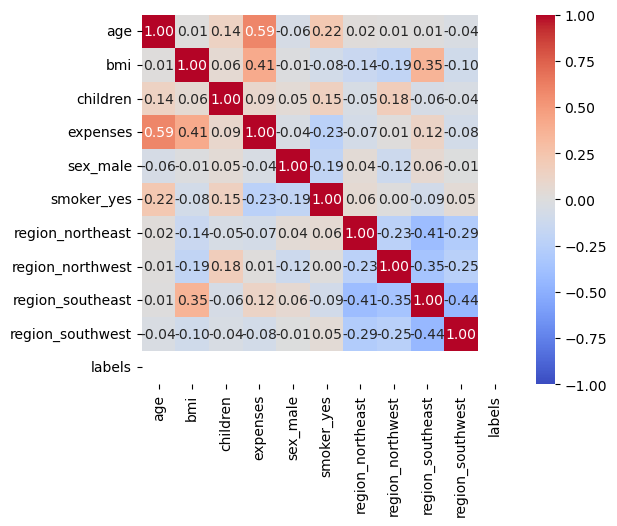

In [42]:
#Корреляция для группы 2 группы
corr_mat = data_new[model.labels_ == 1].corr()
sns.heatmap(corr_mat, square=True,annot = True,fmt='.2f',vmin = -1, vmax=1, cmap='coolwarm')
print('Элементов в классе: '+str(len(data_new[model.labels_ == 1])))
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)
#У этой группы корреляция цены от возраста и bmi

Элементов в классе: 196


age  expenses      0.597064
bmi  smoker_yes    0.560603
dtype: float64

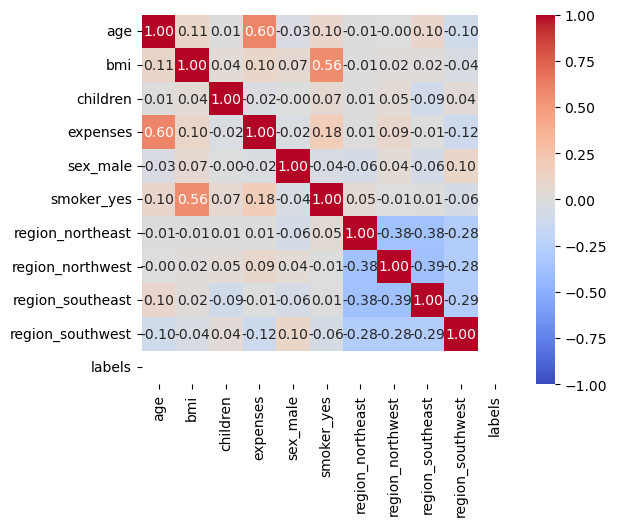

In [43]:
#Корреляция для группы 3 группы
corr_mat = data_new[model.labels_ == 2].corr()
sns.heatmap(corr_mat, square=True,annot = True,fmt='.2f',vmin = -1, vmax=1, cmap='coolwarm')
print('Элементов в классе: '+str(len(data_new[model.labels_ == 2])))
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)
#У этой группы корреляция цены от возраста и bmi, и bmi от курения

In [58]:
data_new

,age,bmi,children,expenses,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,labels
0,-1.438227,-0.453476,-0.908274,0.298472,-1.010141,0,-0.565056,-0.566206,-0.611095,1.764821,2
1,-1.509401,0.513994,-0.078738,-0.953333,0.989221,1,-0.565056,-0.566206,1.635183,-0.566206,0
2,-0.797655,0.382811,1.580335,-0.728402,0.989221,1,-0.565056,-0.566206,1.635183,-0.566206,0
3,-0.441782,-1.306161,-0.908274,0.719574,0.989221,1,-0.565056,1.764821,-0.611095,-0.566206,2
4,-0.512957,-0.289498,-0.908274,-0.776511,0.989221,1,-0.565056,1.764821,-0.611095,-0.566206,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768185,0.054855,1.580335,-0.220468,0.989221,1,-0.565056,1.764821,-0.611095,-0.566206,0
1334,-1.509401,0.202436,-0.908274,-0.913661,-1.010141,1,1.768415,-0.566206,-0.611095,-0.566206,0
1335,-1.509401,1.022325,-0.908274,-0.961237,-1.010141,1,-0.565056,-0.566206,1.635183,-0.566206,0
1336,-1.295877,-0.797830,-0.908274,-0.930013,-1.010141,1,-0.565056,-0.566206,-0.611095,1.764821,0


# Разбиение на обучающую и тестовую выборку

In [59]:
#Предсказываем цену для первого класса
from sklearn.model_selection import train_test_split
data_lr = data_new[data_new['labels'] == 0]
X = data_lr.drop(['expenses','labels'], axis=1)
y = data_lr['expenses']


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state =42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(739, 247)

# Обучение

In [61]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_train_predict = model.predict(X_train)
X_train.describe()

,age,bmi,children,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,-0.005778,0.006106,-0.042817,-0.003696,0.993234,-0.003002,0.052037,-0.039647,-0.007895
std,0.993109,1.021974,1.005645,1.000335,0.082032,0.998489,1.029734,0.978967,0.995524
min,-1.509401,-2.404813,-0.908274,-1.010141,0.000000,-0.565056,-0.566206,-0.611095,-0.566206
25%,-0.868830,-0.732239,-0.908274,-1.010141,1.000000,-0.565056,-0.566206,-0.611095,-0.566206
50%,-0.014735,-0.043531,-0.078738,0.989221,1.000000,-0.565056,-0.566206,-0.611095,-0.566206
75%,0.839360,0.636977,0.750799,0.989221,1.000000,-0.565056,1.764821,1.635183,-0.566206
max,1.764630,3.678767,3.239407,0.989221,1.000000,1.768415,1.764821,1.635183,1.764821


In [63]:
model.coef_

array([ 2.99151912e-01,  7.02316071e-03,  3.91163446e-02, -1.66330076e-02,
       -9.49105866e-01,  2.12815291e+11,  2.13038330e+11,  2.21075958e+11,
        2.13038330e+11])

In [64]:
RSS = ((y_train_predict - y_train)**2).sum()
RSS/N_train, (RSS/N_train)**.5

(0.009367161131206937, 0.09678409544551696)

# Тестируем модель


In [65]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test = mean_squared_error(y_test, y_test_predict)
R2_tain = r2_score(y_train, y_train_predict)
R2_test = r2_score(y_test, y_test_predict)
MSE_train,MSE_test,R2_tain,R2_test

(0.009367161131206937,
 0.016797978997831586,
 0.9091278853410873,
 0.8429947111025619)